In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import scipy.stats as stats
import seaborn as sns

In [103]:
train_data = pd.read_csv("Kaggle_Training_Dataset_v2.csv")
train_data.head()


C:\Users\Hedi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [104]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
sku                  1687861 non-null object
national_inv         1687860 non-null float64
lead_time            1586967 non-null float64
in_transit_qty       1687860 non-null float64
forecast_3_month     1687860 non-null float64
forecast_6_month     1687860 non-null float64
forecast_9_month     1687860 non-null float64
sales_1_month        1687860 non-null float64
sales_3_month        1687860 non-null float64
sales_6_month        1687860 non-null float64
sales_9_month        1687860 non-null float64
min_bank             1687860 non-null float64
potential_issue      1687860 non-null object
pieces_past_due      1687860 non-null float64
perf_6_month_avg     1687860 non-null float64
perf_12_month_avg    1687860 non-null float64
local_bo_qty         1687860 non-null float64
deck_risk            1687860 non-null object
oe_constraint        1687860 non-null object
ppap_risk        

In [105]:
train_data.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [106]:
train_data.isnull().sum().sum()

100915

In [107]:
train_data['lead_time'] = train_data['lead_time'].fillna(train_data['lead_time'].mean())


In [108]:
train_data=train_data.dropna()
train_data.isnull().sum().sum()

0

In [109]:
train_data=train_data.replace(['Yes', 'No'], [1, 0])

In [110]:
np.mean(train_data.forecast_3_month)

178.1192835898712

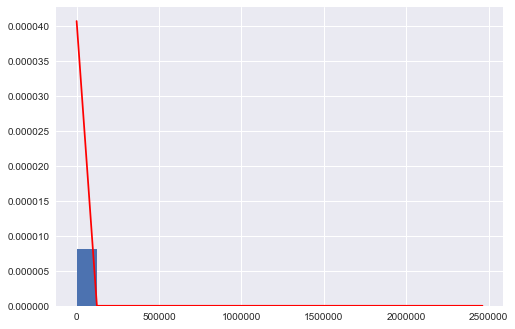

In [111]:
n, bins, patches =plt.hist(train_data.forecast_6_month,20,normed=1)
train_mean = np.mean(train_data.forecast_6_month)
sd = np.std(train_data.forecast_6_month)
plt.plot(bins, mlab.normpdf(bins, train_mean, sd),color='r')
plt.show()

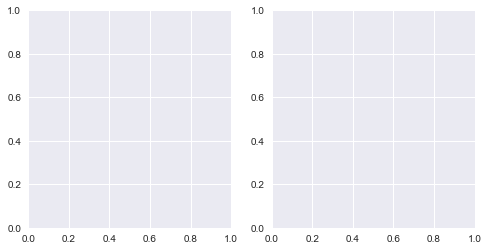

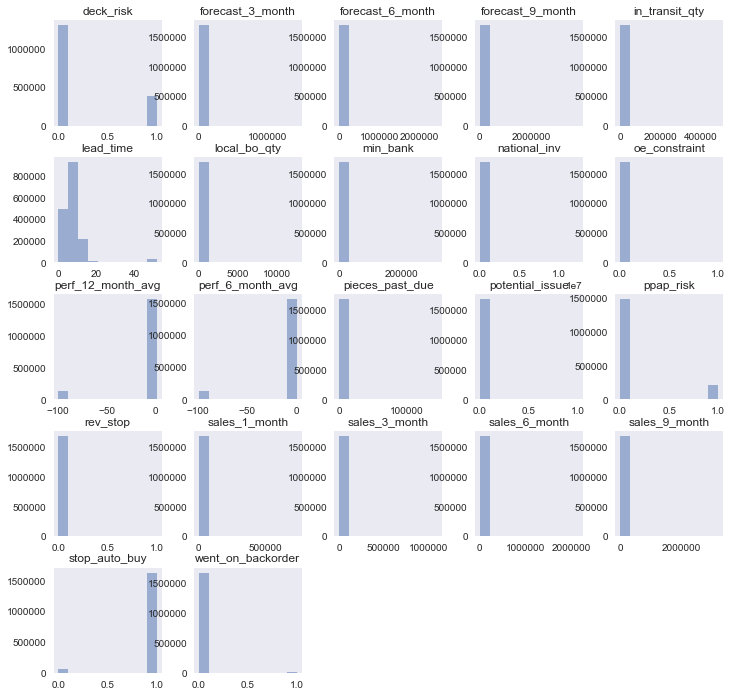

In [112]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
train_data.hist(figsize=(12,12), alpha=0.5, grid=False)
plt.show()

In [113]:
np.shape(train_data)

(1687860, 23)

In [114]:
#sns.pairplot(train_data);
#plt.show()


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X, y = train_data.drop(['lead_time','went_on_backorder'],axis=1), train_data.went_on_backorder
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=0)
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))
#print("Score: {}".format(logreg.score(X_test, y_test)))
training_accuracy = logreg.score(X_train, y_train)
test_accuracy = logreg.score(X_test, y_test)
print("Accuracy on training data: {:0.2f}".format(training_accuracy))
print("Accuracy on test data:     {:0.2f}".format(test_accuracy))



Accuracy on training data: 0.99
Accuracy on test data:     0.99


In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X, y = train_data.drop(['lead_time','sales_3_month'],axis=1), train_data.sales_3_month
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=0)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print(np.mean(y_pred))

R^2: 0.968401474193917
Root Mean Squared Error: 1035.8953802925678
176.90485985


In [116]:
# Create arrays for features and target variable
y = train_data['forecast_3_month'].values
X = train_data['sales_3_month'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

Dimensions of y before reshaping: (1687860,)
Dimensions of X before reshaping: (1687860,)


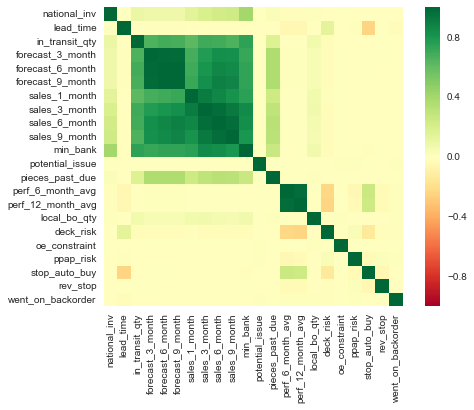

In [117]:
sns.heatmap(train_data.corr(), square=True, cmap='RdYlGn')
plt.show()

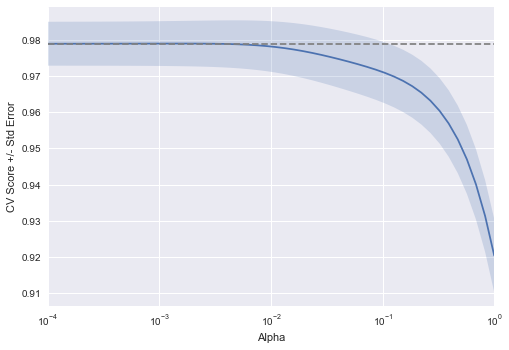

[0.97892935580509843, 0.97893085308717398, 0.97893262323460983, 0.9789347062839614, 0.97893714335829995, 0.97893997382052567, 0.9789432305894572, 0.97894693277764644, 0.97895107450000773, 0.97895560831481876, 0.978960421299649, 0.97896530126591996, 0.97896989015389801, 0.97897362137478283, 0.97897563803553533, 0.97897468999249815, 0.97896901008018422, 0.97895617430281745, 0.97893295784537349, 0.97889520862969359, 0.97883777199423427, 0.97875451139781244, 0.97863847607731902, 0.97848226054358389, 0.97827857562358711, 0.97802100279873938, 0.97770483738442659, 0.97732785765783947, 0.97689081194762262, 0.97639741982727524, 0.97585374909147637, 0.97526694491542576, 0.97464341611830752, 0.97398668240486974, 0.97329512530845042, 0.97255985980807158, 0.97176287230534153, 0.97087548126561773, 0.96985708805786164, 0.96865409861858931, 0.96719879919001561, 0.96540785004910179, 0.9631799283430631, 0.96039194934128602, 0.9568933086639998, 0.95249782357646473, 0.94697360265964348, 0.9400319724847463

In [126]:
X, y = train_data.drop(['sales_3_month','forecast_3_month','forecast_6_month','forecast_9_month'],axis=1), train_data.sales_3_month

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
print( ridge_scores)


In [ ]:
X= train_data.drop(['sales_3_month','forecast_3_month','sales_6_month','forecast_6_month','sales_9_month','forecast_9_month'],axis=1)
y=train_data[['sales_3_month','sales_6_month','sales_9_month']]
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

X = np.transpose(np.array(train_data[:-1]))
y = np.transpose(np.array(train_data[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,3,axis=1)

#Quick visualize data
plt.grid(True)
plt.xlim([-100,5000])
dummy = plt.hist(X[:,0],label = 'col1')
dummy = plt.hist(X[:,1],label = 'col2')
dummy = plt.hist(X[:,2],label = 'col3')
dummy = plt.hist(X[:,3],label = 'col4')
dummy = plt.hist(X[:,4],label = 'col5')
dummy = plt.hist(X[:,5],label = 'col6')
dummy = plt.hist(X[:,6],label = 'col7')
dummy = plt.hist(X[:,7],label = 'col8')
dummy = plt.hist(X[:,8],label = 'col9')
dummy = plt.hist(X[:,9],label = 'col10')
dummy = plt.hist(X[:,10],label = 'col11')
dummy = plt.hist(X[:,11],label = 'col12')
dummy = plt.hist(X[:,12],label = 'col13')
dummy = plt.hist(X[:,13],label = 'col14')
dummy = plt.hist(X[:,14],label = 'col15')
dummy = plt.hist(X[:,15],label = 'col16')
dummy = plt.hist(X[:,16],label = 'col17')
plt.title('Clearly we need feature normalization.')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()
plt.show()

In [ ]:

from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in range(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    #Skip the first column
    if not icol: continue
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

#Quick visualize the feature-normalized data
plt.grid(True)
plt.xlim([-5,5])
dummy = plt.hist(Xnorm[:,0],label = 'col1')
dummy = plt.hist(Xnorm[:,1],label = 'col2')
dummy = plt.hist(Xnorm[:,2],label = 'col3')
dummy = plt.hist(Xnorm[:,3],label = 'col4')
dummy = plt.hist(Xnorm[:,4],label = 'col5')
dummy = plt.hist(Xnorm[:,5],label = 'col6')
dummy = plt.hist(Xnorm[:,6],label = 'col7')
dummy = plt.hist(Xnorm[:,7],label = 'col8')
dummy = plt.hist(Xnorm[:,8],label = 'col9')
dummy = plt.hist(Xnorm[:,9],label = 'col10')
dummy = plt.hist(Xnorm[:,10],label = 'col11')
dummy = plt.hist(Xnorm[:,11],label = 'col12')
dummy = plt.hist(Xnorm[:,12],label = 'col13')
dummy = plt.hist(Xnorm[:,13],label = 'col14')
dummy = plt.hist(Xnorm[:,14],label = 'col15')
dummy = plt.hist(Xnorm[:,15],label = 'col16')
dummy = plt.hist(Xnorm[:,16],label = 'col17')
plt.title('Feature Normalization Accomplished')
plt.xlabel('Column Value')
plt.ylabel('Counts')
dummy = plt.legend()
plt.show()

In [ ]:
#Actual gradient descent minimizing routine
def descendGradient(X, theta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in xrange(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        # Buggy line
        #thetahistory.append(list(tmptheta))
        # Fixed line
        thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in xrange(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

In [ ]:
#Run gradient descent with multiple variables, initial theta still set to zeros
#(Note! This doesn't work unless we feature normalize! "overflow encountered in multiply")
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descendGradient(Xnorm,initial_theta)

#Plot convergence of cost function:
plotConvergence(jvec)


In [ ]:
#print "Final result theta parameters: \n",theta
print "Check of result: What is sales for next 3 month?"
ytest = np.array([1650.,3.])
#To "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
ytestscaled = [(ytest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in range(len(ytest))]
ytestscaled.insert(0,1)
print ("$%0.2f" % float(h(theta,ytestscaled)))